# Step 1 - Loading stellar population models

There are a wide variety of stellar population models available from different authors. The most basic unit is a simple stellar population (SSP), which is the spectrum of a stellar population at one age and one metallicity. In most distributions, these simple stellar populations are grouped together into files containing SSPs of different ages at the same metallicity, and a series of files is provided spanning a range of metallicities.

One such set of models are the Binary Population and Stellar Synthesis (BPASS) models, available from http://bpass.auckland.ac.nz.

For this example I've downloaded the file containing their fiducial, solar metallicity SSP models from version 2.2. The file is in the "data" folder and is called "spectra-bin-imf135_300.z020.dat".

As stated in the [BPASS user manual](https://drive.google.com/file/d/1IYCYf5Bxt1WmqPuFTYLQ7kpN-hKY2SAp/view), the first column contains the wavelengths in Angstroms that the stellar models are sampled at, so let's load those first.

In [1]:
import numpy as np

raw_wavelengths = np.loadtxt("data/spectra-bin-imf135_300.z020.dat", usecols=0)

The readme file also states that the other columns contain fluxes for models at a range of ages. The nth column (where n started at 1 with the wavelength column) is at an age of 10^(6+0.1*(n-2)) years. Let's now create an array of ages and then load the model grid:

In [2]:
ages = np.arange(2, 53)
ages = 10**(6+0.1*(ages-2))

raw_grid = np.loadtxt("data/spectra-bin-imf135_300.z020.dat")[:,1:]

print raw_grid.shape

(100000, 51)


As you've probably noticed, the raw grid is enormous (80 MB), so before we do anything else let's try to get it down to a manageable size. The easiest way of doing this is to interpolate the models onto a coarser grid in wavelength. We're also not going to be fitting any photometry that's bluer than 1000 Angstroms or redder than 6 microns, so we can get rid of regions outside this range entirely.

In [3]:
wavelengths = np.arange(1000., 60000., 10.)

grid = np.zeros((wavelengths.shape[0], raw_grid.shape[1]))

for i in range(raw_grid.shape[1]):
    grid[:,i] = np.interp(wavelengths, raw_wavelengths, raw_grid[:,i])
    
print grid.shape

(5900, 51)


Much better. The final consideration is the units of the data. The models are supplied in units of Solar luminosities per angstron for a star cluster with 10^6 Solar masses. Let's convert this to something familiar like ergs/s/A per Solar mass of stars.

In [4]:
grid /= 10**6

solar_luminosity = 3.827*10**33

grid *= solar_luminosity

Now we have our wavelengths, our ages, and the stellar model grid in the units we want them. Let's take a quick look, just to make sure everything worked:

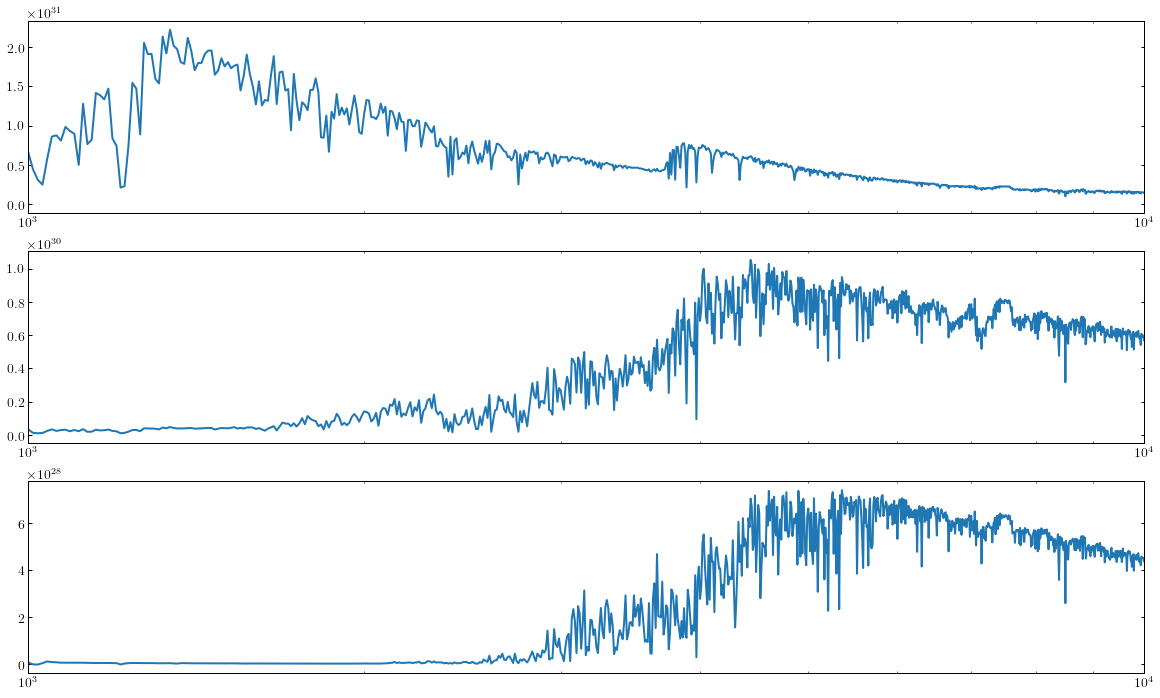

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
axes = [plt.subplot(311), plt.subplot(312), plt.subplot(313)]

for i in range(3):
    ax = axes[i]
    ax.plot(wavelengths, grid[:,10*(i+2)])
    ax.set_xscale("log")
    ax.set_xlim(1000., 10000.)
    
plt.show()